- Student: Álvaro Esteban Muñoz
- e-mail: alvaro.estebanmunoz@studio.unibo.it

# Libraries and imports

In [138]:
# Util libraries for everything
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Avoid warning messages
import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

# Problem specific libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# 1.

In [139]:
file_path = "./ML-Python-Lab-Data.csv"
random_state = 420

# Define header of the dataset
header = [
    "Index",
    "Sex",
    "Length",
    "Diameter",
    "Height", "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings"
]

# Load data into memory
data = pd.read_csv(file_path, sep=',', names=header, index_col=0)
print(f"Size of the data is {data.shape}\n")
print("Structure of the data:\n")
data.head()

Size of the data is (4177, 9)

Structure of the data:



,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Index,,,,,,,,,
0,M,0.455,0.365,0.095,0.514,0.2245,0.1010,0.150,2.0
1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,0.0
2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,1.0
3,M,0.440,0.365,0.125,0.516,0.2155,0.1140,0.155,1.0
4,I,0.330,0.255,0.080,0.205,0.0895,0.0395,0.055,0.0


In [140]:
# Show description of data
data.describe(include="all")

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,3997.000000,3976.000000,3987.000000,3990.000000,3983.000000,4002.000000,3990.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.525330,0.408448,0.139669,0.830577,0.360681,0.180995,0.239796,0.861623
std,NaN,0.119569,0.098728,0.041988,0.490629,0.221100,0.109425,0.139765,0.762510
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,NaN,0.450000,0.350000,0.115000,0.444500,0.188000,0.094000,0.130000,0.000000
50%,NaN,0.545000,0.425000,0.140000,0.802250,0.339000,0.171500,0.235000,1.000000
75%,NaN,0.615000,0.480000,0.165000,1.154375,0.503250,0.253500,0.330000,1.000000


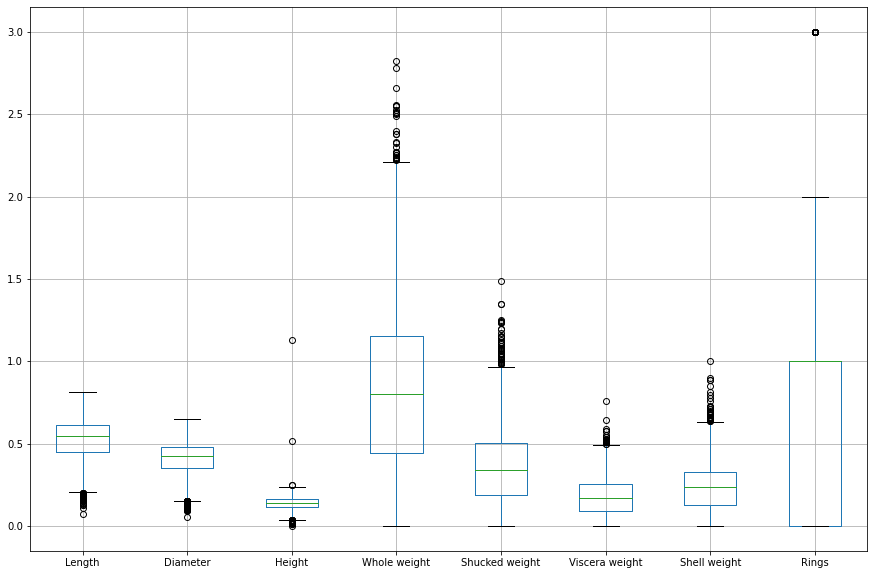

In [141]:
# Box plot
plt.figure(figsize=(15,10))
data.boxplot()
plt.show()

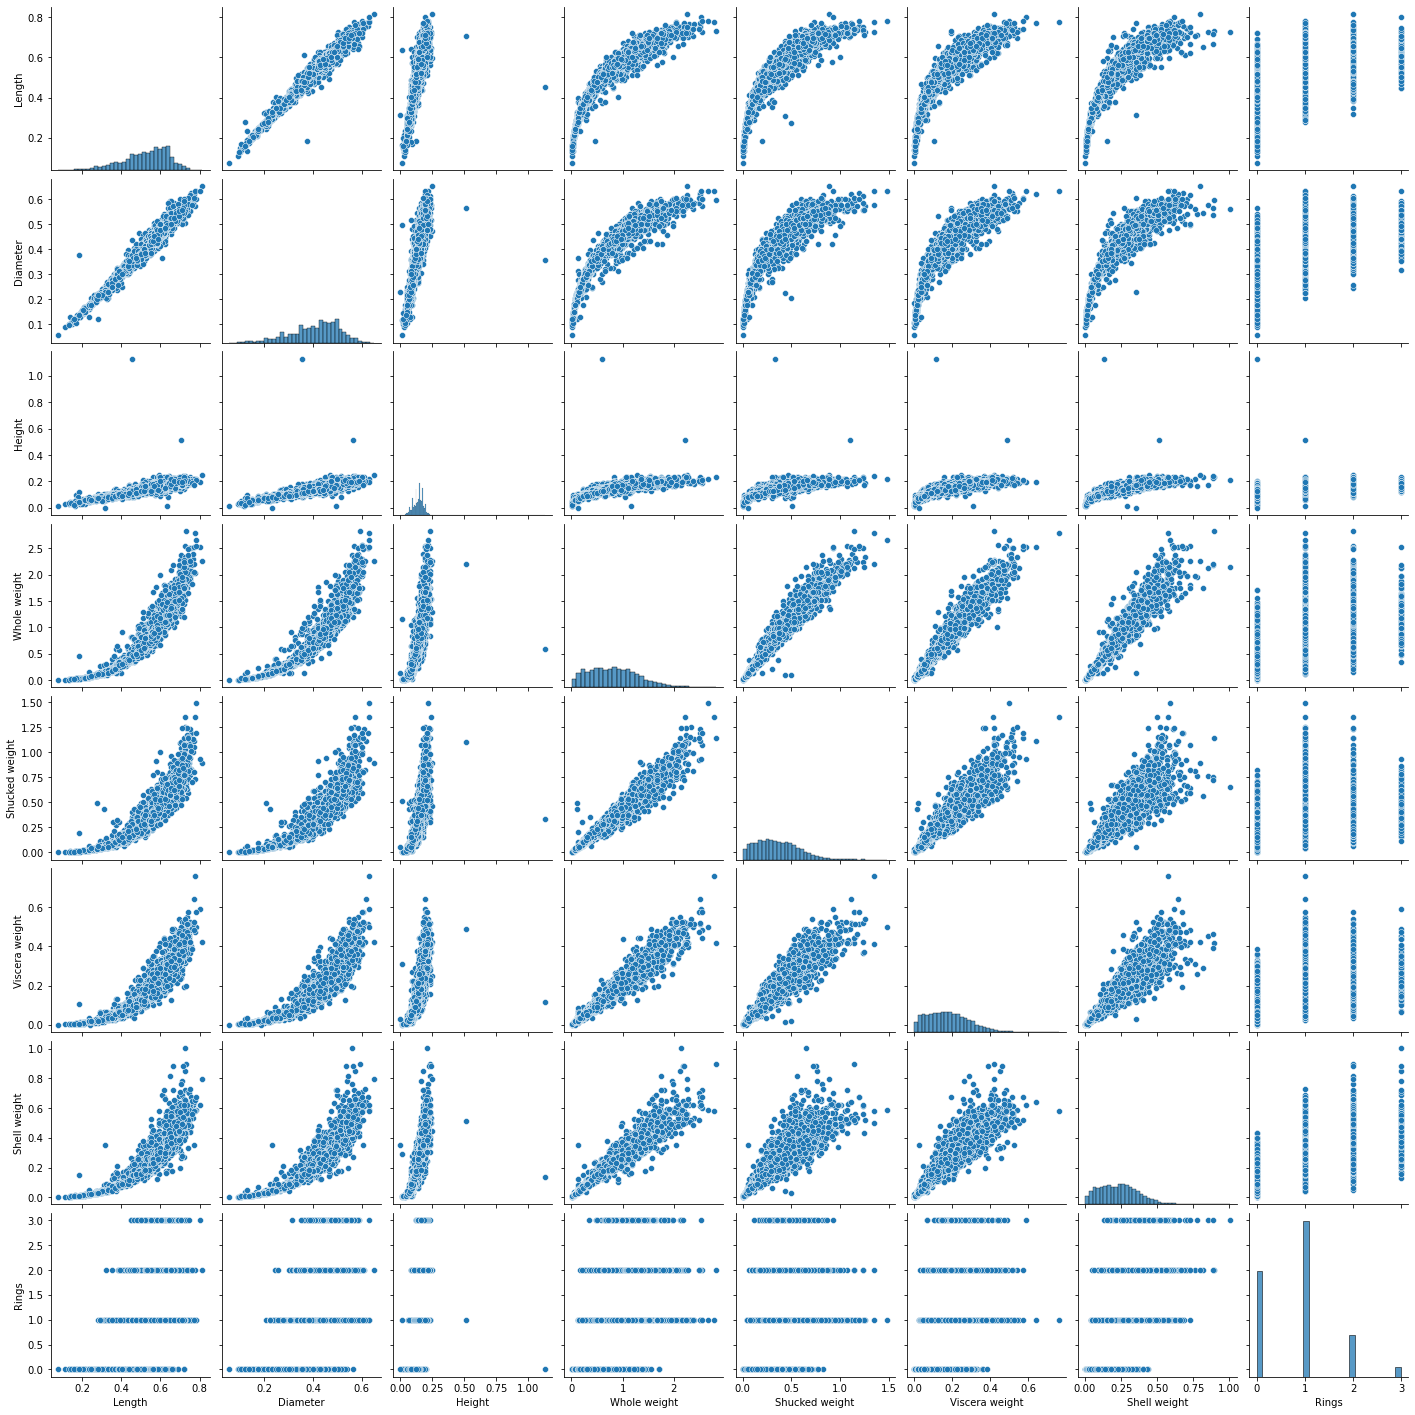

In [142]:
# Pair plot
sns.pairplot(data, diag_kind="hist")
plt.show()

# 2.

In the boxplot, we can notice we have some __outliers__ in each attribute, although is not an incredible amount, we should consider it when choosing our classification method.

In the pairplot, we can notice the attribute "*Rings*" is very __unbalanced__, since most of the data is part of values 0 and 1, this could be a problem when having representative data, this can also be notice on the boxplot.

Notice in the description of data (count row) we have some __missing__ values_ for each attribute. Given the amount of data, it does not seem to be a huge problem. However, we have to keep in mind we need to deal with those datapoints.

# 3.

We will drop the __height__ attribute, since it does not seem to have a strong correlation with the rest of the attributes (notice on the pairplot).

In [143]:
# Drop height column
data_clean = data.drop("Height", axis=1)

# Drop rows with missing values
data_clean = data_clean.dropna()
data_clean[data_clean.isna().any(axis=1)]   # Check the rows with missing values is empty

,Sex,Length,Diameter,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Index,,,,,,,,


Notice we have one categorical attribute, "Sex", we will drop it to avoid complex preprocessing. However, it would be enough to apply some encoding like OneHotEnconding to deal with it.

In [144]:
# Deal with the categorical attribute, we will drop it to avoid
data_clean = data_clean.drop("Sex", axis=1)

# 4.

We will try Naive Bayes and KNN classifiers.

In [145]:
# Split data into X and y. Target attribute is "Rings"
X = data_clean.drop("Rings", axis=1)
y = data_clean['Rings']

# Split data into train and test
# I will use proportions 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [146]:
# Define some variables to make the tuning process easier

# Parameters to be tuned:
tuned_param_nb = [{'var_smoothing': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-07, 1e-8, 1e-9, 1e-10]}]
tuned_param_knn =[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# Dictionary of models
models = {
    'nb': {'name': 'Gaussian Naive Bayes',
           'estimator': GaussianNB(),
           'param': tuned_param_nb
          },
    'knn':{'name': 'K Nearest Neighbor',
           'estimator': KNeighborsClassifier(),
           'param': tuned_param_knn
       },
}

# Score to be optimized
score = "f1_macro"

In [147]:
optimized_models = []

for model in models.values():
    clf = GridSearchCV(model['estimator'], model['param'], scoring=score)
    clf.fit(X_train, y_train)
    optimized_models.append(clf)

for model in optimized_models:
    print(model.best_params_)

{'var_smoothing': 1e-06}
{'n_neighbors': 10}


# 5.

In [148]:
# Predict with the models on the test set to evaluate performance
# REMEMBER:
# optimized_models[0] -> naive bayes
# optimized_models[1] -> knn

y_pred_nb = optimized_models[0].best_estimator_.predict(X_test)
y_pred_knn = optimized_models[1].best_estimator_.predict(X_test)

f1_nb = f1_score(y_test, y_pred_nb, average="macro")
f1_knn = f1_score(y_test, y_pred_knn, average="macro")

# Show performance measures
print(f"f1_macro of {optimized_models[0].best_estimator_}: {f1_nb}")
print(f"f1_macro of {optimized_models[1].best_estimator_}: {f1_knn}")

f1_macro of GaussianNB(var_smoothing=1e-06): 0.48127466600729407
f1_macro of KNeighborsClassifier(n_neighbors=10): 0.44817962140740875


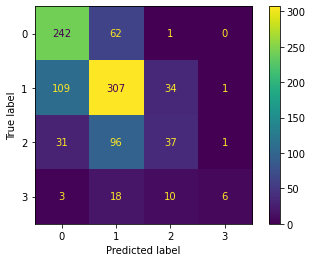

In [149]:
# Define confusion matrix (Naive bayes)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Display confusion matrix
ConfusionMatrixDisplay(cm_nb).plot()
plt.show()

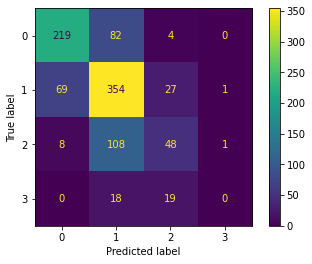

In [150]:
# Define confusion matrix (Knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Display confusion matrix
ConfusionMatrixDisplay(cm_knn).plot()
plt.show()

# 6.

After all the classification process, we can observe our Naive Bayes classifier performs a bit better than the KNN classifier. However, the results are still not satisfiable.

Notice in the confusion matrix that the third label is hard to classify. As we said in the data exploration, since this class is not that well represented, is quite natural that becomes hard for the classifier to identify it.

Solution would be to have more representative data, specially for this class. We could also use some sort of technique for data augmentation.